# 시계열 분석 [깊게 파고들어 구현까지]

직접 데이터셋을 만들어 모델에 대입해보자!

## 코드 구조 파악

###먼저 구현할 신경망 변수들을 살펴보면,

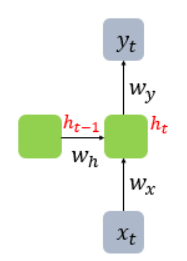

- 은닉층 : ht = tanh(Wx*xt + Wh*ht-1 + b)
- 출력층 : yt = activation function(Wy*ht + b)

Y = W*X + B 의 인공신경망 공식을 참고, 이후 괄호 안의 값은 인공신경망의 값이라 생각하면 됨,

1. 현재 입력값 xt(X임) 는 가중치 wx(W임)와 곱해짐

2. 이전 은닉값 ht-1(X임) 은 가중치 wh(W임)와 곱해짐

3. 두 곱해진 값과 bias(B)가 더해지고, 활성화함수 tanh가 씌워지면 ht(Y임)

4. ht가(Y가) 다시 (X)로 들어가고 wy(W임)와 곱해지고, bias(B)가 더해짐, 활성화함수(activation function)은 자유 선택하여 씌워주면 출력 값 yt(Y임)이 완성


### 변수들이 가지는 행렬의 차원을 살펴보면,

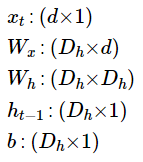

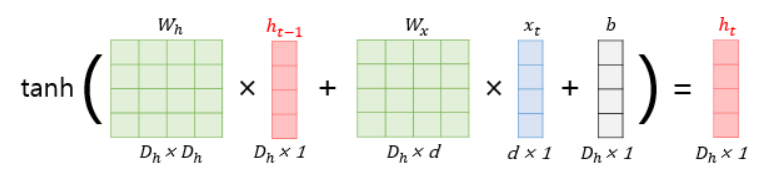

- x인 input data는 주로 단어를 사용하니 1차원으로 표시
- w인 weight는 행렬곱을 위해 대부분 크기를 맞춰줌을 참고
- b인 bias는 행렬 덧셈을 위해 w*x 된 행렬과 같은 크기로 설정

### 간단하게 [의사코드] 로 구현해보자면,

        hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화

        for input_t in input_length: # 각 시점마다 입력을 받는다.
    
            output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    
            hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.

In [ ]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) 
# 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) 
# 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [ ]:
print(hidden_state_t) 
# 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

In [ ]:
Wx = np.random.random((hidden_size, input_size))  
# (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
# 은닉 상태 크기 * 입력 크기
Wh = np.random.random((hidden_size, hidden_size)) 
# (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
# 은닉 상태 크기 * 은닉 상태 크기
b = np.random.random((hidden_size,))
# (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).
# 은닉 상태 크기
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) 
  # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t))
   # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) 
  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

## [RNN 셀 CODE] 구조만 구현

### 간단한 RNN 셀

In [ ]:
import torch
import torch.nn as nn

input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)
# 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서 정의

cell = nn.RNN(input_size, hidden_size, batch_first=True)
# RNN 셀 만들어주는 함수
# batch_first = 입력 텐서의 첫번째 차원이 배치 크기임을 명시

outputs, _status = cell(inputs)
# 입력 텐서를 RNN 셀에 입력해 출력 확인
# 모든 시점의 은닉상태, 마지막 시점의 은닉 상태 각각 outputs, _status

In [ ]:
print(outputs.shape)
# 모든 시점의 hidden_state
# 10번의 시점동안 8차원의 은닉 상태가 출력

In [ ]:
print(_status.shape) 
# 최종 시점의 hidden_state
# 마지막 시점

### 2층 RNN

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)
outputs, _status = cell(inputs)

In [ ]:
print(outputs.shape)
# 위와 같은 모든 시점의 은닉 상태

In [ ]:
print(_status.shape) 
# 위와 다르게 마지막 층의 은닉 상태가 2개의 층임
# (층개수, 배치크기, 은닉상태크기)

## [시계열 분석] 직접 데이터셋 만들기 & 예제

### 데이터셋 직접 제작

#### 그래프 생성 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12

# 임의의 시간 값 (time), 시계열 데이터 (series)를 입력받아 Matplotlib 그래프로 나타내는 함수
# X, Y축 레이블을 각각 ‘Time’, ‘Value’로 지정하고, 데이터 영역에 그리드를 표시
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

#### [경향성] 을 가지는 시계열 데이터

In [ ]:
def trend(time, slope=0):
    return slope * time

time = np.arange(4 * 365 + 1)
series = trend(time, slope=0.1)

plot_series(time, series)
plt.show()
# slope 값에 따라서 시간에 따라 양의 경향성, 음의 경향성을 가질 수 있다
# 길이 4 * 365 + 1의 시간 동안 시간에 따라 0.1의 기울기를 갖는 시계열 데이터

#### [계절성] 을 가지는 시계열 데이터

In [ ]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.6,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plot_series(time, series)
plt.show()
# 입력 season_time에 대해서 0.6보다 작은 경우에는 np.cos(season_time * 2 * np.pi) 값을, 그렇지 않은 경우에는 1 / np.exp(3 * season_time)을 반환
# seasonality() 함수는 주어진 주기 period에 대해 특정 값을 반복하는 시계열 데이터를 반환하는 함수

#### [노이즈] 를 가지는 시계열 데이터

In [ ]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.rand(len(time)) * noise_level

noise_level = 100
noise = white_noise(time, noise_level, seed=42)

plot_series(time, noise)
plt.show()
# 0에서 noise_level 값 사이의 임의의 실수를 갖는 시계열 데이터를 반환

#### [자기상관성] 을 가지는 시계열 데이터

In [ ]:
split_time = 1000
time_train, x_train = time[:split_time], series[:split_time]
time_valid, x_valid = time[split_time:], series[split_time:]

def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    pi = 0.8
    ar =  rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += pi * ar[step - 1]       ## 이전의 값의 0.8배를 더하기
    return ar[1:] * amplitude

series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()
# ar은 정규분포를 갖는 임의의 데이터

#### [경향성][계절성][노이즈][자기상관성] 을 모두 가지는 시계열 데이터

In [ ]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2) 
plot_series(time[:200], series[:200])
plt.show()


#### 특정 구간을 기준으로 달라지는 시계열 데이터

In [ ]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2) + white_noise(time, noise_level, seed=42)
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550 + white_noise(time, noise_level, seed=42)
series[200:] = series2[200:]        # 자기상관 amp 10->5, 계절성 amp 150->2, 경향성 slope 2->-1 + 550
series += white_noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()

### 제작한 데이터로 시계열 데이터 예측 준비하기

#### 데이터 먼저 만들고

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()

#### 훈련용, 검증용 나누기

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_train, x_train)
plt.show()

plot_series(time_valid, x_valid)
plt.show()

## [시계열데이터 분석] 직접 만든 데이터셋 (LSTM)

확인결과 간단한 숫자만 가능함...

x data로 기존에 만든 시계열 데이터를 사용한다. ㅡ> time

y data로 기존에 만든 시계열 데이터를 사용한다. ㅡ> series

data의 개수에 따라 유동적으로 모델 훈련 가능

- EX) 경향성 데이터를 사용할 경우, time에 따른 Values가 1/10정도의 규칙을 가지는것을 알 수 있다.

- 이때 20번의 훈련을 거친 결과, time에 2000이라는 값을 넣어서 예측한 결과, 199.xx인 2000과 가까운 값을 얻음을 확인할 수 있다.    



In [ ]:
x= time
y = series

In [ ]:
print(time.shape)
print(series.shape)

In [ ]:
x = x.reshape((x.shape[0], 1, 1))
x

In [ ]:
y

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
 
# print(x.shape) # (13,3)
# print(y.shape) # (13,)
time_train = time_train.reshape((time_train.shape[0], 1, 1))
# print(x.shape) # (13,3,1)
 
model = Sequential()
model.add(Dense(64, activation = 'ELU', input_shape=(1,1)))
model.add(Dense(32, activation = 'ELU'))
model.add(Dense(64, activation = 'ELU'))
model.add(Dense(32, activation = 'ELU'))
model.add(Dense(1))
 
model.compile(optimizer='adam', loss='mse')
model.fit(time_train, x_train, epochs=500, batch_size=10)
 



In [ ]:
# predict용
# x_input = array([2000])
# x_input = x_input.reshape((1,1,1))
yhat = model.predict(time_valid,x_valid).all()
print(yhat)

plot_series(yhat, x_valid)
plt.show()
plot_series(time_valid, x_valid)
plt.show()

## [시계열 데이터 분석] 주가 예측 Pytorch

- 원하는 데이터셋을 직접 만들어 모델 훈련 가능
- csv 파일의 1열은 시간 (2xxx-xx-xx) 년, 월, 일 에 대한 숫자 입력
- 2열부터 N-1 (N이 마지막 열이라 할때) 까지 x input data로 사용
- N열은 y output data로 사용하여 결과 예측
- 데이터셋을 만들때 주의할 점
  - 날짜를 제외한 모든 데이터는 실수형이어야함 (자유롭게 코드 변경은 가능)
  - 복잡한 모델 불가능 (규칙성이 너무 없는거)
  - 대충, 시가(start), 최고가(best), 종가(close)로 우상향 그래프의 데이터셋 구성해서 훈련 가능
  - parameter는 learning rate, node 수, epoch 횟수 정도 변경 가능

import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/시계열_비제작데이터.csv')
df.head()

In [ ]:
#정규화
scaler = MinMaxScaler()
df[['start','best','close']] = scaler.fit_transform(df[['start','best','close']])
df.head()

In [ ]:
df.info()

In [ ]:
#GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

In [ ]:
X = df[['start','best']].values
y = df['close'].values

In [ ]:
# RNN사용을 위한 시계열데이터에서 swquence 길이 정해주기
# 길이는 5, for문에서 0-4인덱스까지는 x가 5개의 값을 가지고, y는 5인덱스 값을 가진다
# 즉, 5일째의 값(x)으로 6일째 값을(y) 예측
def seq_data(x, y, sequence_length):
  
  x_seq = []
  y_seq = []
  for i in range(len(x) - sequence_length):
    x_seq.append(x[i: i+sequence_length])
    y_seq.append(y[i+sequence_length])

  return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view([-1, 1]) 
# float형 tensor로 변형, gpu사용가능하게 .to(device)를 사용.

In [ ]:
# dataset 을 200개를 기점으로 train test 나누어준다.
split = 200
sequence_length = 5

x_seq, y_seq = seq_data(X, y, sequence_length)

x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]
x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]
print(x_train_seq.size(), y_train_seq.size())
print(x_test_seq.size(), y_test_seq.size())

In [ ]:
# 배치 형태, 시계열 데이터이므로 셔플을 무작위로 하면 안됨!
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 20
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

Model & train

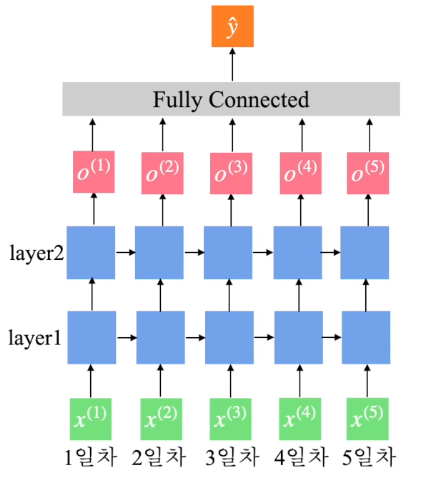

In [ ]:
input_size = x_seq.size(2)
num_layers = 4
hidden_size = 16

In [ ]:
class VanillaRNN(nn.Module):

  def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
    super(VanillaRNN, self).__init__()
    self.device = device
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Sequential(nn.Linear(hidden_size * sequence_length, 1), nn.Sigmoid())

  def forward(self, x):
    h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 초기 hidden state 설정하기.
    out, _ = self.rnn(x, h0) # out: RNN의 마지막 레이어로부터 나온 output feature 를 반환한다. hn: hidden state를 반환한다.
    out = out.reshape(out.shape[0], -1) # many to many 전략
    out = self.fc(out)
    return out
model = VanillaRNN(input_size=input_size,
                   hidden_size=hidden_size,
                   sequence_length=sequence_length,
                   num_layers=num_layers,
                   device=device).to(device)

criterion = nn.MSELoss()

lr = 1e-3
num_epochs = 500
optimizer = optim.Adam(model.parameters(), lr=lr)

loss_graph = [] # 그래프 그릴 목적인 loss.
n = len(train_loader)

for epoch in range(num_epochs):
  running_loss = 0.0

  for data in train_loader:

    seq, target = data # 배치 데이터.
    out = model(seq)   # 모델에 넣고,
    loss = criterion(out, target) # output 가지고 loss 구하고,

    optimizer.zero_grad() # 
    loss.backward() # loss가 최소가 되게하는 
    optimizer.step() # 가중치 업데이트 해주고,
    running_loss += loss.item() # 한 배치의 loss 더해주고,

  loss_graph.append(running_loss / n) # 한 epoch에 모든 배치들에 대한 평균 loss 리스트에 담고,
  if epoch % 100 == 0:
    print('[epoch: %d] loss: %.4f'%(epoch, running_loss/n))

Loss & predict

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.show()

In [ ]:
def plotting(train_loader, test_loader, actual):
  with torch.no_grad():
    train_pred = []
    test_pred = []

    for data in train_loader:
      seq, target = data
      out = model(seq)
      train_pred += out.cpu().numpy().tolist()

    for data in test_loader:
      seq, target = data
      out = model(seq)
      test_pred += out.cpu().numpy().tolist()
      
  total = train_pred + test_pred
  plt.figure(figsize=(20,10))
  plt.plot(np.ones(100)*len(train_pred), np.linspace(0,1,100), '--', linewidth=0.6)
  plt.plot(actual, '--')
  plt.plot(total, 'b', linewidth=0.6)

  plt.legend(['train boundary', 'actual', 'prediction'])
  plt.show()

plotting(train_loader, test_loader, df['close'][sequence_length:])

## [텍스트 분석] 문자 & 단어 Pytorch

### 간단한 문자 분석

입력 문자열 넣으면

정답 문자열을 예측

dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

input_str = 'kimtaejung'
label_str = 'cbnuman!!!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 13
output_size = 13
learning_rate = 0.1

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

# nn.RNN() 파이토치는 기본적으로 3차원 텐서를 입력받음
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

model

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

net = Net(input_size, hidden_size, output_size)
outputs = net(X)
print(outputs.shape) # 3차원 텐서

print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

print(Y.shape)
print(Y.view(-1).shape)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

train & result

In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

### 복잡한 문자 분석

긴 문자열을 여러개 입력

하나의 문장으로 의미를 이어 출력

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩
print(char_dic) # 공백도 여기서는 하나의 원소

dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

# 데이터 구성
x_data = []
y_data = []

# 시퀀스 길이 10단위로 샘플 잘라서 데이터 생성
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index
print(x_data[0])
print(y_data[0])

x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

print(X[0]) # 첫번째 샘플만 출력
print(Y[0])

model

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓습니다.

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

outputs = net(X)
print(outputs.shape) # 3차원 텐서
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.
print(Y.shape)
print(Y.view(-1).shape)

train & result

In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

### 단어 분석

문자열을 입력, 문자열을 분리 (x,y)

단어를 숫자로 표현해 x문자열로 y문자열을 예측

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
sentence = "Repeat is the best medicine for memory".split()
vocab = list(set(sentence))
print(vocab)

word2index = {tkn: i for i, tkn in enumerate(vocab, 1)}  # 단어에 고유한 정수 부여
word2index['<unk>']=0
print(word2index)
print(word2index['memory'])

# 수치화된 데이터를 단어로 바꾸기 위한 사전
index2word = {v: k for k, v in word2index.items()}
print(index2word)
print(index2word[2])

# 단어를 정수로 인코딩 + 입력 데이터와 라벨 데이터 분리
def build_data(sentence, word2index):
    encoded = [word2index[token] for token in sentence] # 각 문자를 정수로 변환. 
    input_seq, label_seq = encoded[:-1], encoded[1:] # 입력 시퀀스와 레이블 시퀀스를 분리
    input_seq = torch.LongTensor(input_seq).unsqueeze(0) # 배치 차원 추가
    label_seq = torch.LongTensor(label_seq).unsqueeze(0) # 배치 차원 추가
    return input_seq, label_seq
X, Y = build_data(sentence, word2index)
print(X)
print(Y)



model

In [ ]:
class Net(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
        super(Net, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, # 워드 임베딩
                                            embedding_dim=input_size)
        self.rnn_layer = nn.RNN(input_size, hidden_size, # 입력 차원, 은닉 상태의 크기 정의
                                batch_first=batch_first)
        self.linear = nn.Linear(hidden_size, vocab_size) # 출력은 원-핫 벡터의 크기를 가져야함. 또는 단어 집합의 크기만큼 가져야함.

    def forward(self, x):
        # 1. 임베딩 층
        # 크기변화: (배치 크기, 시퀀스 길이) => (배치 크기, 시퀀스 길이, 임베딩 차원)
        output = self.embedding_layer(x)
        # 2. RNN 층
        # 크기변화: (배치 크기, 시퀀스 길이, 임베딩 차원)
        # => output (배치 크기, 시퀀스 길이, 은닉층 크기), hidden (1, 배치 크기, 은닉층 크기)
        output, hidden = self.rnn_layer(output)
        # 3. 최종 출력층
        # 크기변화: (배치 크기, 시퀀스 길이, 은닉층 크기) => (배치 크기, 시퀀스 길이, 단어장 크기)
        output = self.linear(output)
        # 4. view를 통해서 배치 차원 제거
        # 크기변화: (배치 크기, 시퀀스 길이, 단어장 크기) => (배치 크기*시퀀스 길이, 단어장 크기)
        return output.view(-1, output.size(2))

# 하이퍼 파라미터
vocab_size = len(word2index)  # 단어장의 크기는 임베딩 층, 최종 출력층에 사용된다. <unk> 토큰을 크기에 포함한다.
input_size = 5  # 임베딩 된 차원의 크기 및 RNN 층 입력 차원의 크기
hidden_size = 20  # RNN의 은닉층 크기

# 모델 생성
model = Net(vocab_size, input_size, hidden_size, batch_first=True)
# 손실함수 정의
loss_function = nn.CrossEntropyLoss() # 소프트맥스 함수 포함이며 실제값은 원-핫 인코딩 안 해도 됨.
# 옵티마이저 정의
optimizer = optim.Adam(params=model.parameters())

# 임의로 예측해보기. 가중치는 전부 랜덤 초기화 된 상태이다.
output = model(X)
print(output)
print(output.shape)

# 수치화된 데이터를 단어로 전환하는 함수
decode = lambda y: [index2word.get(x) for x in y]

train & result

In [ ]:
# 훈련 시작
for step in range(201):
    # 경사 초기화
    optimizer.zero_grad()
    # 순방향 전파
    output = model(X)
    # 손실값 계산
    loss = loss_function(output, Y.view(-1))
    # 역방향 전파
    loss.backward()
    # 매개변수 업데이트
    optimizer.step()
    # 기록
    if step % 1 == 0:
        print("[{:02d}/201] {:.4f} ".format(step+1, loss))
        pred = output.softmax(-1).argmax(-1).tolist()
        print(" ".join(["Repeat"] + decode(pred)))
        print()